In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.integrate import quad,dblquad

In [2]:
def model(w,phase,t):
    return np.sin(w*t+phase)

In [171]:
def generate_data(w,phase,t,sigma,rng):
    noise = rng.normal(0,sigma,size=len(t))
    return model(w,phase,t) + noise

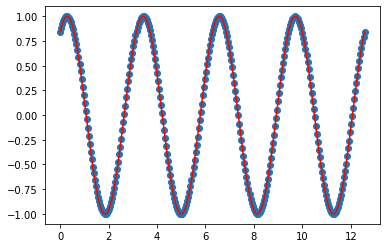

In [166]:
t = np.linspace(0,4*np.pi,300)
rng = np.random.RandomState(seed=1)
plt.scatter(t,generate_data(2,1,t,0.1,rng))
plt.plot(t,model(2,1,t),c="red")

In [5]:
logroot2pi = np.log(np.sqrt(2*np.pi))

In [6]:
def neg_log_likelihood(w,phase,y_k,t,sigma):
    y = model(w,phase,t)
    return logroot2pi*len(t) + np.log(sigma)*len(t) + np.sum((y-y_k)**2, axis=-1) / (2*sigma**2)

Text(0, 0.5, 'negative log likelihood')

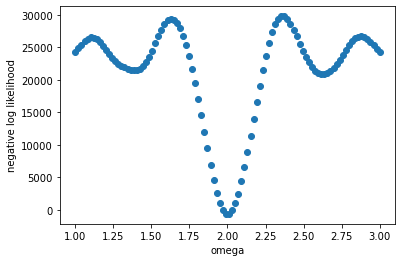

In [167]:
sigma = 0.1
phase = 1
t = np.linspace(0,4*np.pi,500)
rng = np.random.RandomState(seed=1)
y_k = generate_data(2,phase,t,sigma,rng)
w_vec = np.linspace(1,3,100).reshape(-1,1)
nll = neg_log_likelihood(w_vec,phase,y_k,t,sigma)
plt.scatter(w_vec,nll)
plt.xlabel("omega")
plt.ylabel("negative log likelihood")

Text(0, 0.5, 'negative log likelihood')

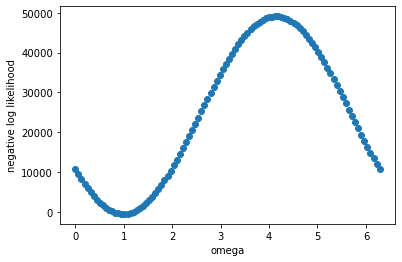

In [26]:
sigma = 0.1
phase = 1
w = 2
t = np.linspace(0,4*np.pi,500)
rng = np.random.RandomState(seed=1)
y_k = generate_data(w,phase,t,sigma,rng)
phase_vec = np.linspace(0,2*np.pi,100).reshape(-1,1)
nll = neg_log_likelihood(w,phase_vec,y_k,t,sigma)
plt.scatter(phase_vec,nll)
plt.xlabel("omega")
plt.ylabel("negative log likelihood")

In [85]:
def log_prior(w, phase, w_1, w_2, dist="flat", mu=2, sigma=1):
    if dist == "flat":
        p = 1/(2*np.pi) * 1/(w_2-w_1)
    if dist == "gaussian":
        p = 1/(np.sqrt(2*np.pi) * sigma)*np.exp(-(w-mu)**2/(2*sigma**2))
    return np.log(p)

With frequency

In [86]:
def evidence_integrand(w, phase, y_k, t, sigma, w_1, w_2, dist="flat"):
    return np.exp(-neg_log_likelihood(w,phase,y_k,t,sigma)+log_prior(w, phase, w_1, w_2, dist))

In [87]:
def neg_log_posterior(w, phase, y_k, t, sigma, evidence, w_1, w_2, dist):
    return neg_log_likelihood(w,phase,y_k,t,sigma) + np.log(evidence) - log_prior(w, phase, w_1, w_2, dist)

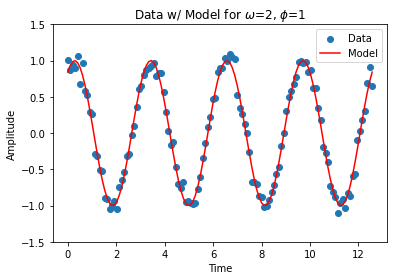

In [139]:
sigma = 0.1
phase = 1
t = np.linspace(0,4*np.pi,125)
rng = np.random.RandomState(seed=1)

# calculate nll for data y_k(omega = 2, phase = 1) over a range of parameters
y_k = generate_data(2,phase,t,sigma,rng)
plt.scatter(t,y_k,label="Data")
plt.plot(t,model(2,phase,t),c="red",label="Model")
plt.title("Data w/ Model for $\omega$=2, $\phi$=1")
plt.ylim(-1.5,1.5)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.savefig('Data_Model_plot.png')
plt.savefig('nll_data.png')

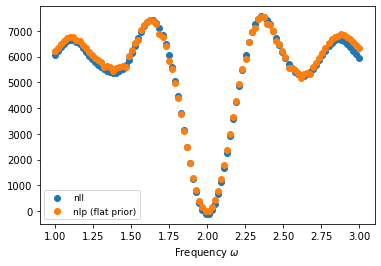

In [170]:
w_1 = 1
w_2 = 3
sigma = 0.1
phase = 1
t = np.linspace(0,4*np.pi,125)
rng = np.random.RandomState(seed=1)

# calculate nll for data y_k(omega = 2, phase = 1) over a range of parameters
y_k = generate_data(2,phase,t,sigma,rng)
w_vec = np.linspace(w_1,w_2,100).reshape(-1,1)
nll_w = neg_log_likelihood(w_vec,phase,y_k,t,sigma)
plt.scatter(w_vec, nll_w, label="nll")


# calculate the nlp:
rng = np.random.RandomState(seed=1)
w_vec = np.linspace(w_1,w_2,100).reshape(-1,1)
y_k = generate_data(w_vec,phase,t,sigma,rng)

# calculate evidence for each data realization with different priors
evidence = []
for x in y_k:
    evidence.append(quad(evidence_integrand, w_1, w_2, args=(phase,x,t,sigma,w_1,w_2,"flat"))[0])
evidence = np.array(evidence)

evidence_g = []
for x in y_k:
    evidence_g.append(quad(evidence_integrand, w_1, w_2, args=(phase,x,t,sigma,w_1,w_2,"gaussian"))[0])
evidence_g = np.array(evidence_g)

# calculate nlp for parameters w = 2, phase = 1
w = 2
phase = 1
nlp_w = neg_log_posterior(w,phase,y_k,t,sigma,evidence,w_1,w_2,"flat")
#nlp_g = neg_log_posterior(w,phase,y_k,t,sigma,evidence_g,w_1,w_2,"gaussian")
plt.scatter(w_vec, nlp_w, label="nlp (flat prior)")
#plt.scatter(w_vec, nlp_g, label="nlp (Gaussian prior)")
plt.legend(prop={'size': 9})
plt.xlabel('Frequency $\omega$')
plt.savefig('likelihood_posterior_omega.png')
plt.show()

With Phase

In [58]:
def evidence_integrand_phase(phase, w, y_k, t, sigma, w_1, w_2, dist="flat"):
    return np.exp(-neg_log_likelihood(w,phase,y_k,t,sigma)+log_prior(w, phase, w_1, w_2, dist))

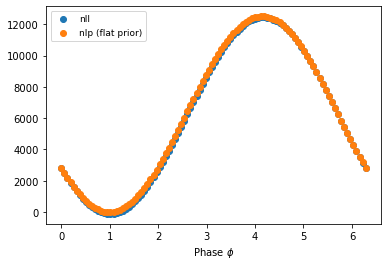

In [134]:
sigma = 0.1
t = np.linspace(0,4*np.pi,125)
rng = np.random.RandomState(seed=1)

# calculate nll for data y_k(omega = 2, phase = 1) over a range of parameters
w = 2
phase = 1
y_k = generate_data(w,phase,t,sigma,rng)
phase_vec = np.linspace(0,2*np.pi,100).reshape(-1,1)
nll_p = neg_log_likelihood(w,phase_vec,y_k,t,sigma)
plt.scatter(phase_vec, nll_p, label="nll")

# calculate the nlp:
rng = np.random.RandomState(seed=1)
phase_vec = np.linspace(0,2*np.pi,100).reshape(-1,1)
y_k = generate_data(w,phase_vec,t,sigma,rng)

# calculate evidence for each data realization
evidence = []
for x in y_k:
    evidence.append(quad(evidence_integrand_phase, 0, 2*np.pi, args=(w,x,t,sigma,w_1,w_2,"flat"))[0])
evidence = np.array(evidence)

# calculate nlp for parameters w = 2, phase = 1
w = 2
phase = 1
nlp_p = neg_log_posterior(w,phase,y_k,t,sigma,evidence,w_1,w_2,"flat")
#nlp_g = neg_log_posterior(w,phase,y_k,t,sigma,evidence_g,w_1,w_2,"gaussian")
plt.scatter(phase_vec, nlp_p, label="nlp (flat prior)")
#plt.scatter(w_vec, nlp_g, label="nlp (Gaussian prior)")
plt.legend(prop={'size': 9})
plt.xlabel('Phase $\phi$')
plt.savefig('likelihood_posterior_phase.png')
plt.show()